In [37]:
# Getting the data
# Getting the infomation of the data
# cleaning the data
# Formatting the data
# Exploring the data


In [38]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [39]:
# Get coins from CoinStats API
# Declare request url and headers
url = "https://openapiv1.coinstats.app/coins"

headers = {
    "accept": "application/json",
    "X-API-KEY": "L/5CF8pQELWwvhdTG7rFaiAwRnYebZA56rLqx+8C2XM="
}

response = requests.get(url, headers=headers)

print(response.text)


{"result":[{"id":"bitcoin","icon":"https://static.coinstats.app/coins/1650455588819.png","name":"Bitcoin","symbol":"BTC","rank":1,"price":102159.52802894481,"priceBtc":1,"volume":122834707041.78687,"marketCap":2023441182779.8687,"availableSupply":19806681,"totalSupply":21000000,"fullyDilutedValuation":2145350088607.841,"priceChange1h":-0.05,"priceChange1d":3.68,"priceChange1w":10.43,"redditUrl":"https://www.reddit.com/r/Bitcoin/","twitterUrl":"https://twitter.com/bitcoin","explorers":["https://mempool.space/","https://platform.arkhamintelligence.com/explorer/token/bitcoin","https://blockchair.com/bitcoin/","https://btc.com/","https://btc.tokenview.io/","https://www.oklink.com/btc","https://3xpl.com/bitcoin"]},{"id":"ethereum","icon":"https://static.coinstats.app/coins/1650455629727.png","name":"Ethereum","symbol":"ETH","rank":2,"price":3682.353556862276,"priceBtc":0.03604728436811878,"volume":29000365482.776352,"marketCap":443625365773.7143,"availableSupply":120473322,"totalSupply":120

In [40]:
data = response.json()

In [41]:
# Preview the JSON
print(json.dumps(data, indent=4))

{
    "result": [
        {
            "id": "bitcoin",
            "icon": "https://static.coinstats.app/coins/1650455588819.png",
            "name": "Bitcoin",
            "symbol": "BTC",
            "rank": 1,
            "price": 102159.52802894481,
            "priceBtc": 1,
            "volume": 122834707041.78687,
            "marketCap": 2023441182779.8687,
            "availableSupply": 19806681,
            "totalSupply": 21000000,
            "fullyDilutedValuation": 2145350088607.841,
            "priceChange1h": -0.05,
            "priceChange1d": 3.68,
            "priceChange1w": 10.43,
            "redditUrl": "https://www.reddit.com/r/Bitcoin/",
            "twitterUrl": "https://twitter.com/bitcoin",
            "explorers": [
                "https://mempool.space/",
                "https://platform.arkhamintelligence.com/explorer/token/bitcoin",
                "https://blockchair.com/bitcoin/",
                "https://btc.com/",
                "https://btc.to

In [59]:
# Normalize the 'result' column to expand the nested JSON data
df_result = pd.json_normalize(data['result'])

# Display the first few rows of the new dataframe
df_result.head()

,id,icon,name,symbol,rank,price,priceBtc,volume,marketCap,availableSupply,...,fullyDilutedValuation,priceChange1h,priceChange1d,priceChange1w,redditUrl,twitterUrl,explorers,websiteUrl,contractAddress,decimals
0,bitcoin,https://static.coinstats.app/coins/16504555888...,Bitcoin,BTC,1,102159.528029,1.000000,1.228347e+11,2.023441e+12,19806681,...,2.145350e+12,-0.05,3.68,10.43,https://www.reddit.com/r/Bitcoin/,https://twitter.com/bitcoin,"[https://mempool.space/, https://platform.arkh...",NaN,NaN,NaN
1,ethereum,https://static.coinstats.app/coins/16504556297...,Ethereum,ETH,2,3682.353557,0.036047,2.900037e+10,4.436254e+11,120473322,...,4.436254e+11,0.02,1.31,10.02,https://www.reddit.com/r/ethereum,https://twitter.com/ethereum,"[https://etherscan.io/, https://platform.arkha...",https://www.ethereum.org/,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0
2,ripple,https://static.coinstats.app/coins/XRPdnqGJ.png,XRP,XRP,3,2.410084,0.000024,3.116955e+09,1.384570e+11,57449049415,...,2.409764e+11,-0.26,0.68,17.09,https://www.reddit.com/r/ripple,https://twitter.com/Ripple,"[https://blockchair.com/ripple, https://xrpcha...",https://ripple.com/currency/,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,18.0
3,tether,https://static.coinstats.app/coins/16504557718...,Tether,USDT,4,0.999250,0.000010,9.109439e+10,1.374169e+11,137520044570,...,1.374169e+11,0.10,0.15,0.13,https://www.reddit.com,https://twitter.com/Tether_to,[https://etherscan.io/token/0xdac17f958d2ee523...,https://tether.to/,0xdac17f958d2ee523a2206206994597c13d831ec7,18.0
4,binance-coin,https://static.coinstats.app/coins/16666081453...,BNB,BNB,5,728.959288,0.007136,1.168635e+10,1.063461e+11,145887576,...,1.063461e+11,-1.07,2.93,3.35,https://www.reddit.com/r/binance,https://twitter.com/binance,"[https://bscscan.com, https://platform.arkhami...",https://www.binance.com,BNB,18.0


In [60]:
# Keep id, name, symbol, price, volume, marketCap, 
# availableSupply, fullyDilutedValuation, priceChange1h, priceChange1d,
# priceChange1w, websiteUrl
df_result = df_result[['id', 'name', 'symbol', 'rank', 'price', 'volume',
                       'marketCap','availableSupply','priceChange1h',
                       'priceChange1d', 'priceChange1w', 'websiteUrl']]
df_result.head(19)


,id,name,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl
0,bitcoin,Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05,3.68,10.43,NaN
1,ethereum,Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02,1.31,10.02,https://www.ethereum.org/
2,ripple,XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26,0.68,17.09,https://ripple.com/currency/
3,tether,Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.10,0.15,0.13,https://tether.to/
4,binance-coin,BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07,2.93,3.35,https://www.binance.com
5,solana,Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.00,2.75,14.03,https://solana.com/
6,dogecoin,Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18,1.25,24.21,NaN
7,usd-coin,USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11,-0.09,-0.12,https://www.circle.com/en/usdc
8,cardano,Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.60,0.16,26.84,https://cardano.org/
9,staked-ether,Lido Staked Ether,STETH,10,3677.710000,4.763444e+07,3.541770e+10,9635760,-0.15,1.38,9.70,https://www.lido.fi


In [61]:
# I will compare the 'cypto_id' in 'coin_stats' with the 'cypto_id' in 'dt_50_df_YM'
# Check what 'crypto_id' are in both dataframes

# Export the data to a CSV file to folder /Users/jeanstibel/Documents/AI Classes/Projects/01 Project/data_top_50
df_result.to_csv('/Users/jeanstibel/Documents/AI Classes/Projects/01 Project/data_top_50/coin_stats.csv', index=False)




In [62]:
# discover the date of the data
date = time.strftime('%Y-%m-%d')
date


'2025-01-06'

In [63]:
# set index on name
df_result.set_index('name', inplace=True)

# Drop Column 'id'
df_result.drop(columns='id', inplace=True)
df_result.head(19)

,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl
name,,,,,,,,,,
Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05,3.68,10.43,NaN
Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02,1.31,10.02,https://www.ethereum.org/
XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26,0.68,17.09,https://ripple.com/currency/
Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.10,0.15,0.13,https://tether.to/
BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07,2.93,3.35,https://www.binance.com
Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.00,2.75,14.03,https://solana.com/
Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18,1.25,24.21,NaN
USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11,-0.09,-0.12,https://www.circle.com/en/usdc
Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.60,0.16,26.84,https://cardano.org/


In [64]:
# get date type of the columns
df_result.dtypes

symbol              object
rank                 int64
price              float64
volume             float64
marketCap          float64
availableSupply      int64
priceChange1h      float64
priceChange1d      float64
priceChange1w      float64
websiteUrl          object
dtype: object

In [65]:
# get the priceChange1h in percentage
df_result['priceChange1h'] = df_result['priceChange1h'].apply(lambda x: str(round(x, 2)) + '%')

# get the priceChange1w in percentage
df_result['priceChange1w'] = df_result['priceChange1w'].apply(lambda x: str(round(x, 2)) + '%')

# get the priceChange1d in percentage
df_result['priceChange1d'] = df_result['priceChange1d'].apply(lambda x: str(round(x, 2)) + '%')

df_result.head(19)

,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl
name,,,,,,,,,,
Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05%,3.68%,10.43%,NaN
Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02%,1.31%,10.02%,https://www.ethereum.org/
XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26%,0.68%,17.09%,https://ripple.com/currency/
Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.1%,0.15%,0.13%,https://tether.to/
BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07%,2.93%,3.35%,https://www.binance.com
Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.0%,2.75%,14.03%,https://solana.com/
Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18%,1.25%,24.21%,NaN
USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11%,-0.09%,-0.12%,https://www.circle.com/en/usdc
Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.6%,0.16%,26.84%,https://cardano.org/


In [66]:
## Because we dont have the open price I took the price that is the "end" price of the day (because the data that we have is for one day),
## So price end of the day - the porcentage changed that day

# Get the open_price of the coins, its price - priceChangge1d
df_result['open_price'] = df_result['price'] / (1 + df_result['priceChange1d'].apply(lambda x: float(x.strip('%'))/100))
df_result.head(19)


,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl,open_price
name,,,,,,,,,,,
Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05%,3.68%,10.43%,NaN,98533.495398
Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02%,1.31%,10.02%,https://www.ethereum.org/,3634.738483
XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26%,0.68%,17.09%,https://ripple.com/currency/,2.393806
Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.1%,0.15%,0.13%,https://tether.to/,0.997753
BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07%,2.93%,3.35%,https://www.binance.com,708.208771
Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.0%,2.75%,14.03%,https://solana.com/,212.453848
Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18%,1.25%,24.21%,NaN,0.384993
USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11%,-0.09%,-0.12%,https://www.circle.com/en/usdc,1.000069
Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.6%,0.16%,26.84%,https://cardano.org/,1.090674


In [67]:
# Sort data by rank
df_result = df_result.sort_values('rank')
df_result.head(19)

,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl,open_price
name,,,,,,,,,,,
Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05%,3.68%,10.43%,NaN,98533.495398
Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02%,1.31%,10.02%,https://www.ethereum.org/,3634.738483
XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26%,0.68%,17.09%,https://ripple.com/currency/,2.393806
Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.1%,0.15%,0.13%,https://tether.to/,0.997753
BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07%,2.93%,3.35%,https://www.binance.com,708.208771
Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.0%,2.75%,14.03%,https://solana.com/,212.453848
Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18%,1.25%,24.21%,NaN,0.384993
USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11%,-0.09%,-0.12%,https://www.circle.com/en/usdc,1.000069
Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.6%,0.16%,26.84%,https://cardano.org/,1.090674


In [68]:
# Create a column with the difference between open_price and price, day_change
df_result['day_change'] = df_result['price'] - df_result['open_price']
df_result.head(19)

,symbol,rank,price,volume,marketCap,availableSupply,priceChange1h,priceChange1d,priceChange1w,websiteUrl,open_price,day_change
name,,,,,,,,,,,,
Bitcoin,BTC,1,102159.528029,1.228347e+11,2.023441e+12,19806681,-0.05%,3.68%,10.43%,NaN,98533.495398,3.626033e+03
Ethereum,ETH,2,3682.353557,2.900037e+10,4.436254e+11,120473322,0.02%,1.31%,10.02%,https://www.ethereum.org/,3634.738483,4.761507e+01
XRP,XRP,3,2.410084,3.116955e+09,1.384570e+11,57449049415,-0.26%,0.68%,17.09%,https://ripple.com/currency/,2.393806,1.627788e-02
Tether,USDT,4,0.999250,9.109439e+10,1.374169e+11,137520044570,0.1%,0.15%,0.13%,https://tether.to/,0.997753,1.496630e-03
BNB,BNB,5,728.959288,1.168635e+10,1.063461e+11,145887576,-1.07%,2.93%,3.35%,https://www.binance.com,708.208771,2.075052e+01
Solana,SOL,6,218.296329,3.225918e+10,1.055864e+11,483683629,0.0%,2.75%,14.03%,https://solana.com/,212.453848,5.842481e+00
Dogecoin,DOGE,7,0.389805,3.725667e+09,5.748585e+10,147473186384,-0.18%,1.25%,24.21%,NaN,0.384993,4.812413e-03
USDC,USDC,8,0.999169,1.045629e+10,4.580193e+10,45844361527,-0.11%,-0.09%,-0.12%,https://www.circle.com/en/usdc,1.000069,-9.000622e-04
Cardano,ADA,9,1.092419,1.140796e+09,3.916832e+10,35854678075,-0.6%,0.16%,26.84%,https://cardano.org/,1.090674,1.745078e-03


In [69]:
# Rearange the columns
df_result = df_result[['symbol', 'rank', 'open_price', 'price', 'day_change',
                       'priceChange1h', 'priceChange1d', 'priceChange1w', 'volume',
                       'marketCap', 'availableSupply', 'websiteUrl']]
df_result.head(19)

,symbol,rank,open_price,price,day_change,priceChange1h,priceChange1d,priceChange1w,volume,marketCap,availableSupply,websiteUrl
name,,,,,,,,,,,,
Bitcoin,BTC,1,98533.495398,102159.528029,3.626033e+03,-0.05%,3.68%,10.43%,1.228347e+11,2.023441e+12,19806681,NaN
Ethereum,ETH,2,3634.738483,3682.353557,4.761507e+01,0.02%,1.31%,10.02%,2.900037e+10,4.436254e+11,120473322,https://www.ethereum.org/
XRP,XRP,3,2.393806,2.410084,1.627788e-02,-0.26%,0.68%,17.09%,3.116955e+09,1.384570e+11,57449049415,https://ripple.com/currency/
Tether,USDT,4,0.997753,0.999250,1.496630e-03,0.1%,0.15%,0.13%,9.109439e+10,1.374169e+11,137520044570,https://tether.to/
BNB,BNB,5,708.208771,728.959288,2.075052e+01,-1.07%,2.93%,3.35%,1.168635e+10,1.063461e+11,145887576,https://www.binance.com
Solana,SOL,6,212.453848,218.296329,5.842481e+00,0.0%,2.75%,14.03%,3.225918e+10,1.055864e+11,483683629,https://solana.com/
Dogecoin,DOGE,7,0.384993,0.389805,4.812413e-03,-0.18%,1.25%,24.21%,3.725667e+09,5.748585e+10,147473186384,NaN
USDC,USDC,8,1.000069,0.999169,-9.000622e-04,-0.11%,-0.09%,-0.12%,1.045629e+10,4.580193e+10,45844361527,https://www.circle.com/en/usdc
Cardano,ADA,9,1.090674,1.092419,1.745078e-03,-0.6%,0.16%,26.84%,1.140796e+09,3.916832e+10,35854678075,https://cardano.org/


In [70]:
# Modify day_change to 2 decimal places
df_result['day_change'] = df_result['day_change'].apply(lambda x: round(x, 6))
df_result.head(19)

,symbol,rank,open_price,price,day_change,priceChange1h,priceChange1d,priceChange1w,volume,marketCap,availableSupply,websiteUrl
name,,,,,,,,,,,,
Bitcoin,BTC,1,98533.495398,102159.528029,3626.032631,-0.05%,3.68%,10.43%,1.228347e+11,2.023441e+12,19806681,NaN
Ethereum,ETH,2,3634.738483,3682.353557,47.615074,0.02%,1.31%,10.02%,2.900037e+10,4.436254e+11,120473322,https://www.ethereum.org/
XRP,XRP,3,2.393806,2.410084,0.016278,-0.26%,0.68%,17.09%,3.116955e+09,1.384570e+11,57449049415,https://ripple.com/currency/
Tether,USDT,4,0.997753,0.999250,0.001497,0.1%,0.15%,0.13%,9.109439e+10,1.374169e+11,137520044570,https://tether.to/
BNB,BNB,5,708.208771,728.959288,20.750517,-1.07%,2.93%,3.35%,1.168635e+10,1.063461e+11,145887576,https://www.binance.com
Solana,SOL,6,212.453848,218.296329,5.842481,0.0%,2.75%,14.03%,3.225918e+10,1.055864e+11,483683629,https://solana.com/
Dogecoin,DOGE,7,0.384993,0.389805,0.004812,-0.18%,1.25%,24.21%,3.725667e+09,5.748585e+10,147473186384,NaN
USDC,USDC,8,1.000069,0.999169,-0.000900,-0.11%,-0.09%,-0.12%,1.045629e+10,4.580193e+10,45844361527,https://www.circle.com/en/usdc
Cardano,ADA,9,1.090674,1.092419,0.001745,-0.6%,0.16%,26.84%,1.140796e+09,3.916832e+10,35854678075,https://cardano.org/


In [71]:
# Modify open_price separed by commas
df_result['open_price'] = df_result['open_price'].apply(lambda x: "{:,.6f}".format(x))

# modify price to 6 decimal places and use comas to separate thousands
df_result['price'] = df_result['price'].apply(lambda x: "{:,.6f}".format(x))

# get the day_change in percentage
#df_result['day_change'] = df_result['day_change'].apply(lambda x: str(round(x, 2)) + '%')

# Modify the number in availableSupply to be separated by commas
df_result['availableSupply'] = df_result['availableSupply'].astype(int).apply(lambda x: "{:,}".format(x))

# modify the volume to billions
df_result['volume'] = df_result['volume'].apply(lambda x: "{:,.2f}".format(x/1_000_000_000) + 'B')

# modify the marketCap to billions
df_result['marketCap'] = df_result['marketCap'].apply(lambda x: "{:,.2f}".format(x/1_000_000_000) + 'B')

df_result.head(19)

,symbol,rank,open_price,price,day_change,priceChange1h,priceChange1d,priceChange1w,volume,marketCap,availableSupply,websiteUrl
name,,,,,,,,,,,,
Bitcoin,BTC,1,"98,533.495398","102,159.528029",3626.032631,-0.05%,3.68%,10.43%,122.83B,"2,023.44B","19,806,681",NaN
Ethereum,ETH,2,"3,634.738483","3,682.353557",47.615074,0.02%,1.31%,10.02%,29.00B,443.63B,"120,473,322",https://www.ethereum.org/
XRP,XRP,3,2.393806,2.410084,0.016278,-0.26%,0.68%,17.09%,3.12B,138.46B,"57,449,049,415",https://ripple.com/currency/
Tether,USDT,4,0.997753,0.999250,0.001497,0.1%,0.15%,0.13%,91.09B,137.42B,"137,520,044,570",https://tether.to/
BNB,BNB,5,708.208771,728.959288,20.750517,-1.07%,2.93%,3.35%,11.69B,106.35B,"145,887,576",https://www.binance.com
Solana,SOL,6,212.453848,218.296329,5.842481,0.0%,2.75%,14.03%,32.26B,105.59B,"483,683,629",https://solana.com/
Dogecoin,DOGE,7,0.384993,0.389805,0.004812,-0.18%,1.25%,24.21%,3.73B,57.49B,"147,473,186,384",NaN
USDC,USDC,8,1.000069,0.999169,-0.000900,-0.11%,-0.09%,-0.12%,10.46B,45.80B,"45,844,361,527",https://www.circle.com/en/usdc
Cardano,ADA,9,1.090674,1.092419,0.001745,-0.6%,0.16%,26.84%,1.14B,39.17B,"35,854,678,075",https://cardano.org/


In [72]:
# Rename Columns
df_result.rename(columns={'symbol':"Symbol", 'rank': 'Rank', 'open_price':'Open Price', 'price': 'Close Price',
                          'day_change':'Day Change', 'priceChange1h': '1h Change', 'priceChange1d': '24h Change',
                          'priceChange1w': '7d Change', 'volume': 'Volume', 'marketCap': 'Market Cap',
                          'availableSupply': 'Circulating Supply', 'websiteUrl': 'Website'}, inplace=True)
df_result.head(19)


,Symbol,Rank,Open Price,Close Price,Day Change,1h Change,24h Change,7d Change,Volume,Market Cap,Circulating Supply,Website
name,,,,,,,,,,,,
Bitcoin,BTC,1,"98,533.495398","102,159.528029",3626.032631,-0.05%,3.68%,10.43%,122.83B,"2,023.44B","19,806,681",NaN
Ethereum,ETH,2,"3,634.738483","3,682.353557",47.615074,0.02%,1.31%,10.02%,29.00B,443.63B,"120,473,322",https://www.ethereum.org/
XRP,XRP,3,2.393806,2.410084,0.016278,-0.26%,0.68%,17.09%,3.12B,138.46B,"57,449,049,415",https://ripple.com/currency/
Tether,USDT,4,0.997753,0.999250,0.001497,0.1%,0.15%,0.13%,91.09B,137.42B,"137,520,044,570",https://tether.to/
BNB,BNB,5,708.208771,728.959288,20.750517,-1.07%,2.93%,3.35%,11.69B,106.35B,"145,887,576",https://www.binance.com
Solana,SOL,6,212.453848,218.296329,5.842481,0.0%,2.75%,14.03%,32.26B,105.59B,"483,683,629",https://solana.com/
Dogecoin,DOGE,7,0.384993,0.389805,0.004812,-0.18%,1.25%,24.21%,3.73B,57.49B,"147,473,186,384",NaN
USDC,USDC,8,1.000069,0.999169,-0.000900,-0.11%,-0.09%,-0.12%,10.46B,45.80B,"45,844,361,527",https://www.circle.com/en/usdc
Cardano,ADA,9,1.090674,1.092419,0.001745,-0.6%,0.16%,26.84%,1.14B,39.17B,"35,854,678,075",https://cardano.org/


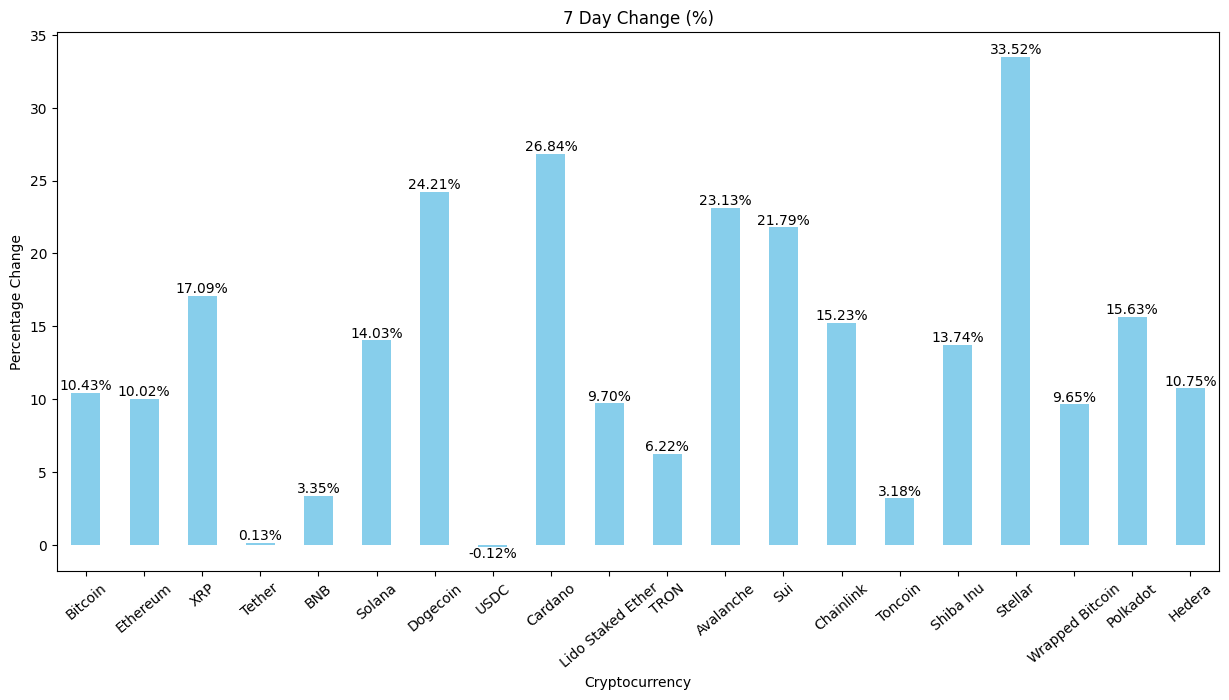

In [73]:
# create a chart graph for 7d Change
df_result['7d Change'] = df_result['7d Change'].apply(lambda x: float(x.strip('%')))
ax = df_result['7d Change'].plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title('7 Day Change (%)')
plt.ylabel('Percentage Change')
plt.xlabel('Cryptocurrency')
plt.xticks(rotation=40)

# Add percentage to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.show()


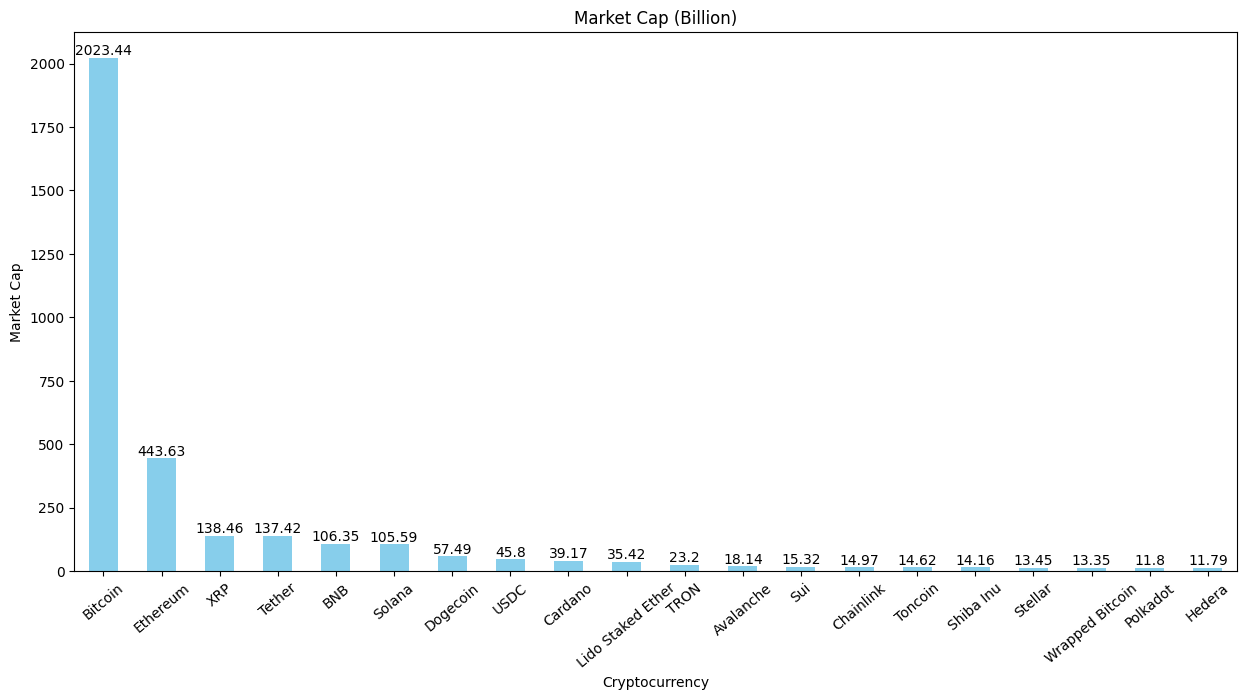

In [75]:
# Convert 'Market Cap' to numeric
df_result['Market Cap'] = df_result['Market Cap'].apply(lambda x: float(x.replace('B', '').replace(',', '')))

# create a graph for market cap
ax = df_result['Market Cap'].plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title('Market Cap (Billion)')
plt.ylabel('Market Cap')
plt.xlabel('Cryptocurrency')
plt.xticks(rotation=40)

# Add amount to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()
